###### The cell below loads the visual style of the notebook when run.

In [1]:
from IPython.core.display import HTML
css_file = '../../styles/styles.css'
HTML(open(css_file, "r").read())

# Matplotlib Styling
---

Use this notebook as a reference guide to styling elements of your plots. This guide is based on the wider [tutorial](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb) by J.R. Johansson.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## The RCParams dictionary

The most powerful and flexible way of changing any plot is through a [dictionary](http://interactivepython.org/runestone/static/thinkcspy/Dictionaries/intro-Dictionaries.html) called ```rcParams```, which matplotlib uses for all plot settings. For example, changing the line width for all plots is done like this:

In [3]:
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2

A full guide to the ```rcParams``` settings available is found [here](http://matplotlib.org/users/customizing.html). The defaults can be restored at any time with 

```python
mpl.rcdefaults()
```

## Formatting text

### Equations and Symbols

One common task is formatting the labels on the axes. We may also want to use the same equation editor that we can use in the Jupyter notebook (LaTeX) to display symbols and equations. 

Matplotlib has great support for LaTeX. All we need to do is to use dollar signs encapsulate LaTeX in any text (legend, title, label, etc.). For example, "\$y=x^3\$". 

But here we can run into a slightly subtle problem with LaTeX code and Python text strings. In LaTeX, we frequently use the backslash in commands, for example \alpha to produce the symbol $\alpha$. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up our latex code, we need to use "raw" text strings. Raw text strings are prepended with an 'r', like r"\alpha" or r'\alpha' instead of "\alpha" or '\alpha': 

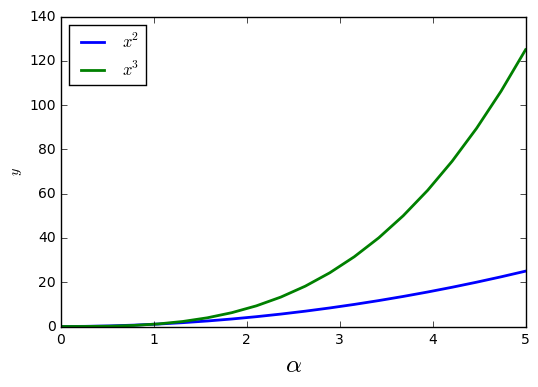

In [4]:
import numpy as np
x = np.linspace(0,5,20)

fig, ax = plt.subplots()
ax.plot(x,x**2,label=r'$x^2$')
ax.plot(x,x**3,label=r'$x^3$')
ax.legend(loc="upper left")
ax.set_xlabel(r'$\alpha$',fontsize=18) # some commands take a fontsize argument
ax.set_ylabel(r'$y$')
plt.show()

### Fontsize and family

If we want to change the global font size and family we can do that through ```rcParams```:

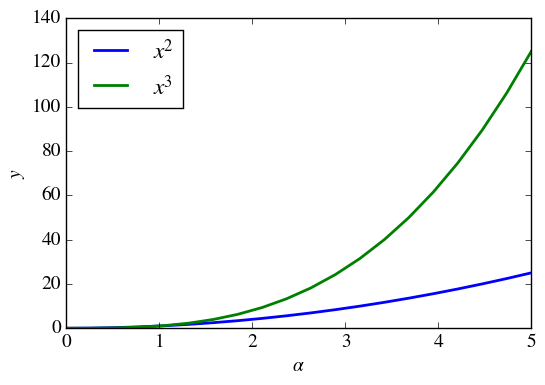

In [5]:
# set the plot to use STIX family fonts
mpl.rcParams.update({'font.size': 14, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig, ax = plt.subplots()
ax.plot(x,x**2,label=r'$x^2$')
ax.plot(x,x**3,label=r'$x^3$')
ax.legend(loc="upper left")
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
plt.show()


# restore defaults
mpl.rcParams.update({'font.size': 12, 'font.family': 'sans'})

## Setting colors, linewidths, linestyles

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. We can use 'r', 'g', 'b', etc for red, green and blue (black is 'k'). 

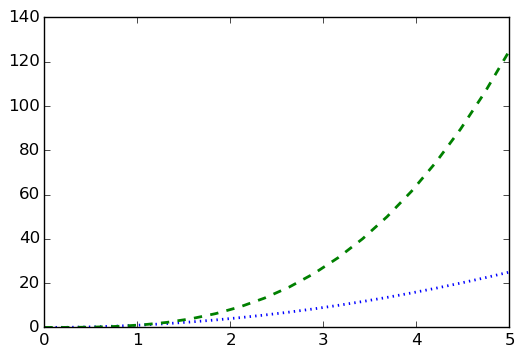

In [6]:
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b:') # blue dotted line 
ax.plot(x, x**3, 'g--') # green dashed line
plt.show()

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the color and alpha keyword arguments: 

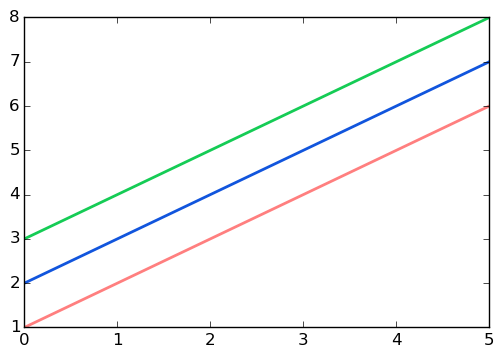

In [7]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color
plt.show()

## Lines and marker styles

To change the line width, we can use the linewidth or lw keyword argument. The line style can be selected using the linestyle or ls keyword arguments:

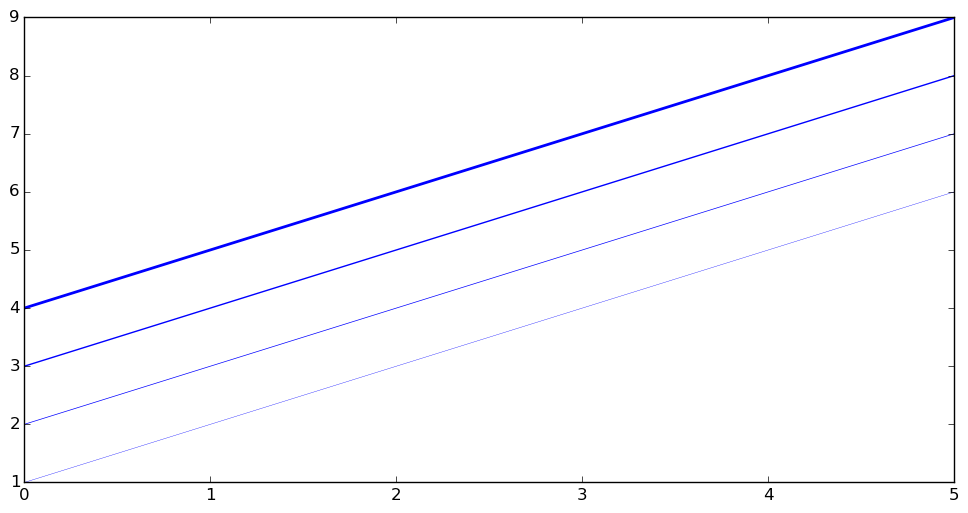

In [8]:
# LINE WIDTHS

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", lw=1.00)
ax.plot(x, x+4, color="blue", lw=2.00)

plt.show()

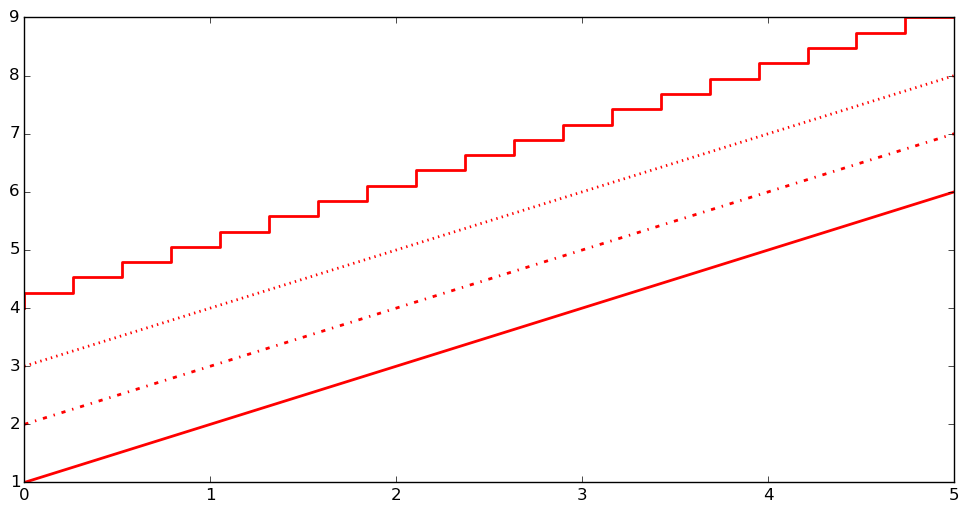

In [9]:
# LINE STYLES

fig, ax = plt.subplots(figsize=(12,6))

# possible linestype options‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+1, color="red", lw=2, linestyle='-')
ax.plot(x, x+2, color="red", lw=2, ls='-.')
ax.plot(x, x+3, color="red", lw=2, ls=':')
ax.plot(x, x+4, color="red", lw=2, ls='steps')

plt.show()

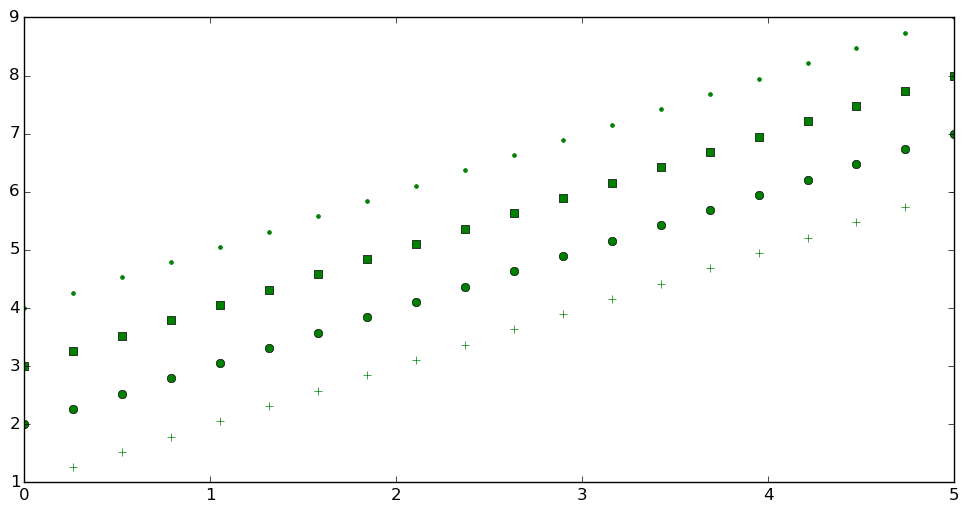

In [10]:
# MARKER SYMBOLS
fig, ax = plt.subplots(figsize=(12,6))

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+1, color="green", lw=2, ls='none', marker='+')
ax.plot(x, x+2, color="green", lw=2, ls='none', marker='o')
ax.plot(x, x+3, color="green", lw=2, ls='none', marker='s')
ax.plot(x, x+4, color="green", lw=2, ls='none', marker='.')

plt.show()

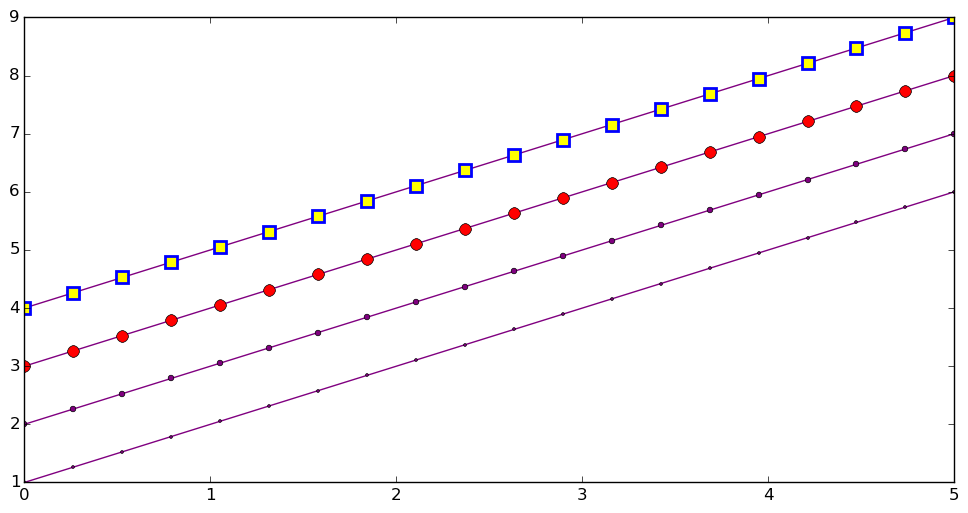

In [11]:
# MARKER SIZE AND COLOR
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+2, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+3, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+4, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        mfc="yellow", markeredgewidth=2, markeredgecolor="blue");
#mfc and mec can be used as shortcuts for markerfacecolor and markeredgecolor

plt.show()

## AXES

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

## Plot range

We've seen how to use ```set_xlim``` and ```set_ylim``` to set the plot limits manually. There is also a method (```axis('tight')```) to crop the limits tightly on the max and min values in the data:

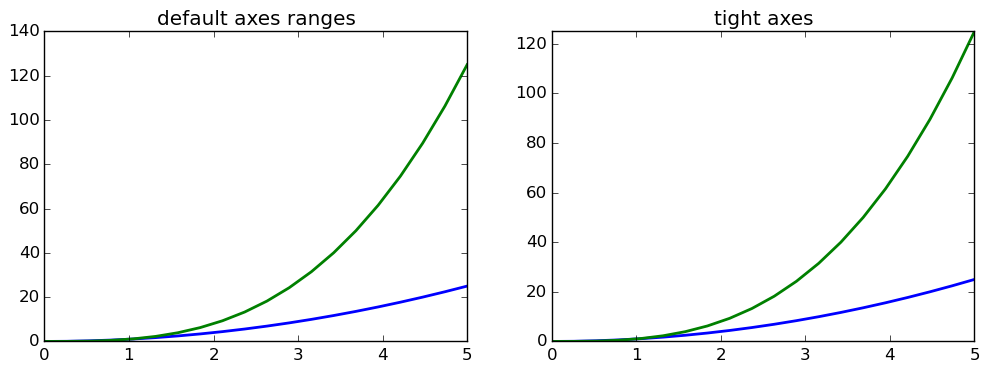

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight') # set the limits tightly around data
axes[1].set_title("tight axes")

plt.show()

### Logarithmic Scales

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using set_xscale and set_yscale methods which accept one parameter (with the value "log" in this case):

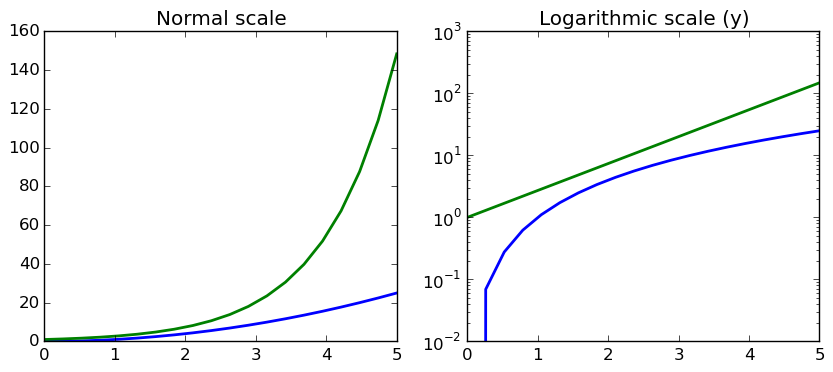

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))

## SET LOG SCALE
axes[1].set_yscale("log")

axes[1].set_title("Logarithmic scale (y)");

### Placement of ticks and tick labels

We can explicitly determine where we want the axis ticks with ```set_xticks``` and ```set_yticks```, which both take a list of values for where on the axis the ticks are to be placed. We can also use the ```set_xticklabels``` and ```set_yticklabels``` methods to provide a list of custom text labels for each tick location:

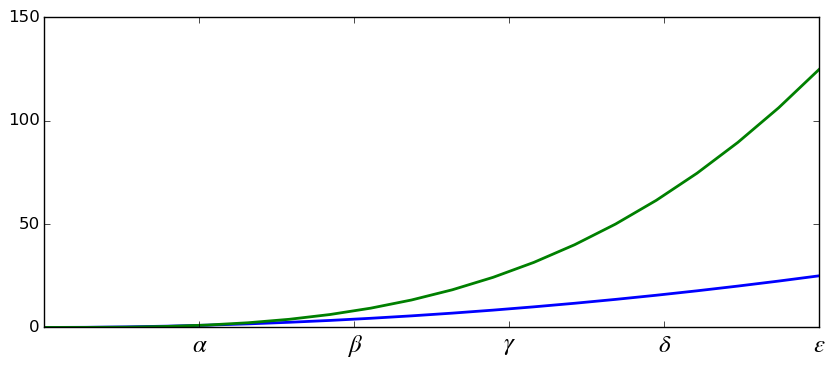

In [14]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2)
ax.plot(x, x**3)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)

plt.show()

There are a number of more advanced methods for controlling major and minor tick placement in matplotlib figures, such as automatic placement according to different policies. See http://matplotlib.org/api/ticker_api.html for details.

### Axis number and label spacing

We may want to change the padding between the axis and the labels.



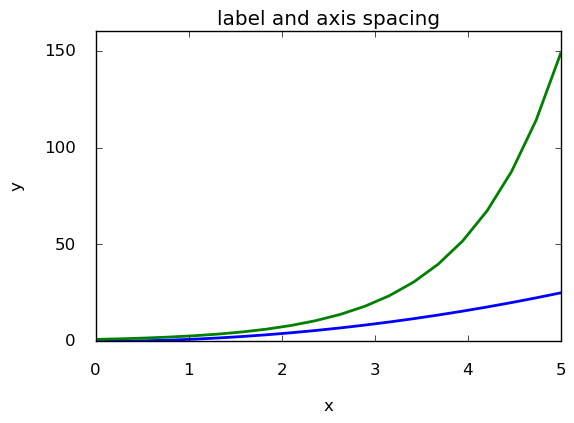

In [15]:
# distance between x and y axis and the numbers on the axes
mpl.rcParams['xtick.major.pad'] = 15
mpl.rcParams['ytick.major.pad'] = 15

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2)
ax.plot(x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15

ax.set_xlabel("x")
ax.set_ylabel("y");

# restore defaults
mpl.rcParams['xtick.major.pad'] = 3
mpl.rcParams['ytick.major.pad'] = 3

### Axis Grid

It is sometimes useful to draw a grid on the axes. With the ```grid``` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the plot function:

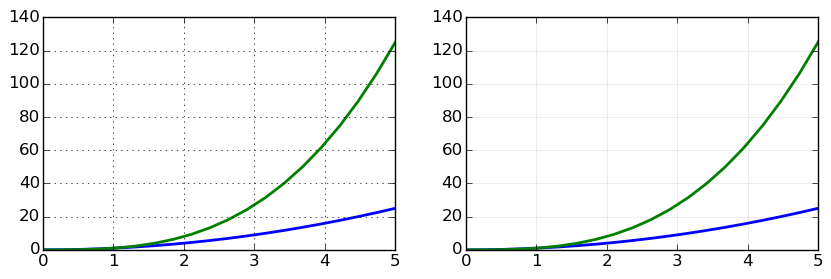

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2)
axes[0].plot(x, x**3)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2)
axes[1].plot(x, x**3)
axes[1].grid(color='k', alpha=0.1, linestyle='solid', linewidth=0.5)

### Axis Spines

We can also change the properties of the axis spines (the boxes drawn along the axes):

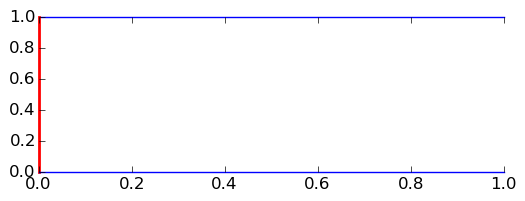

In [17]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

## Twin axes

Sometimes we want to plot two entirely different data sets with different y axes on the same plot. In these cases, it is useful to have dual x or y axes in a figure. Matplotlib supports this with the ```twinx``` and ```twiny``` functions:

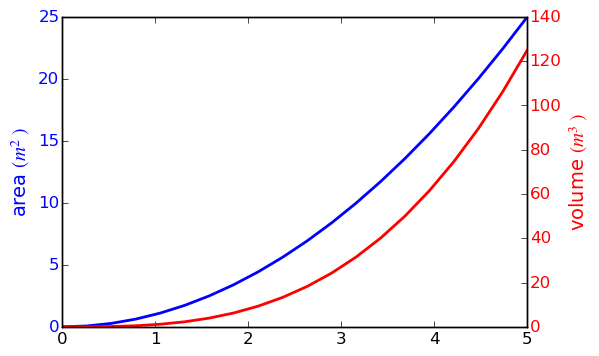

In [18]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=14, color='blue')
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
# make a new axes, which shares the x axis but has a different y axis
ax2 = ax1.twinx()

ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=14, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Plots where the data crosses the origin

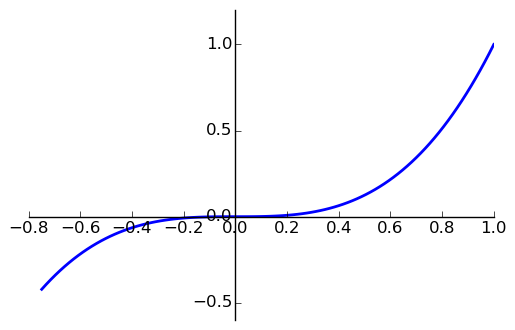

In [19]:
fig, ax = plt.subplots()

# lose the top and right-hand spines 
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

## Pre-canned 'styles'

Matplotlib comes with a set of pre-canned styles. These styles can be loaded to set the aesthetics of your plot.

In [20]:
print (plt.style.available)

['fivethirtyeight', 'ggplot', 'bmh', 'grayscale', 'dark_background']


These styles can be applied using ```plt.style.use(name)```, but this will change the global defaults for all your plots in the same program or notebook. If you want to temporarily use a style you can do so like this:

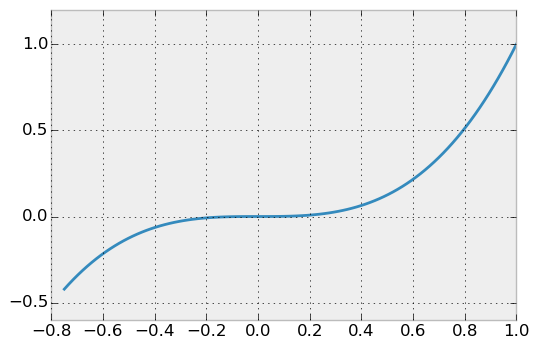

In [21]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots()
    xx = np.linspace(-0.75, 1., 100)
    ax.plot(xx, xx**3);